In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importation de statsmodels
import statsmodels.formula.api as smf

In [3]:
#importer les données Advertising.csv
donnees = pd.read_csv('Advertising.csv', index_col=0)
donnees.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [35]:
#ajustement du modèle
modeleOLS=smf.ols(formula='Sales~TV', data=donnees).fit()

In [36]:
modeleOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 21 Jun 2016   Prob (F-statistic):           1.47e-42
Time:                        13:46:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#regression linéaire avec scikit-learn
from sklearn.linear_model import LinearRegression

In [9]:
#créer un objet reg lin
modeleReg=LinearRegression()

In [11]:
#créer y et X
list_var=donnees.columns.drop("Sales")
y=donnees.Sales
X=donnees[list_var]

In [13]:
modeleReg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print modeleReg.intercept_
print modeleReg.coef_

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [16]:
modeleReg.predict(X)

array([ 20.52397441,  12.33785482,  12.30767078,  17.59782951,
        13.18867186,  12.47834763,  11.72975995,  12.12295317,
         3.72734086,  12.55084872,   7.0322992 ,  17.28512918,
        10.57712073,   8.82630048,  18.43436638,  20.81929952,
        12.82365674,  23.22495716,   9.95168206,  14.16607293,
        18.10076728,  14.7405382 ,   6.4891503 ,  16.5459329 ,
         8.14651887,  15.6100386 ,  14.98951429,  17.05167344,
        19.41053803,   9.14402389,  21.6339338 ,  11.3460929 ,
         7.63888314,  18.86426829,   7.57483051,  17.00682618,
        23.40590052,  15.62347779,   9.90868103,  20.44761039,
        16.37766467,  17.2959832 ,  21.59580326,  13.96385684,
         8.88787996,  15.16152314,   8.87338673,  21.7226299 ,
        16.26362018,   8.1681656 ,  12.63121132,   9.33981296,
        20.66297563,  19.94469957,  20.37443008,  21.2926106 ,
         8.52771254,  12.77458802,  21.89805198,  18.13348698,
         5.74215558,  22.89067208,  16.78426073,  13.21

In [20]:
RMSE=np.sqrt(((y-modeleReg.predict(X))**2).sum()/len(y))
RMSE

1.6685701407225699

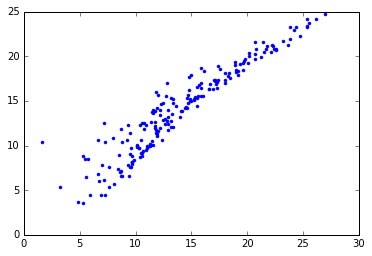

In [21]:
plt.plot(y, modeleReg.predict(X),'.')

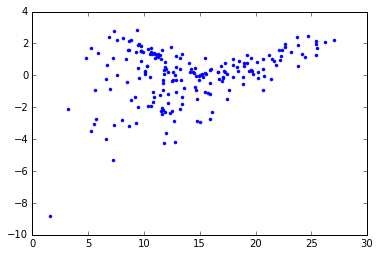

In [22]:
plt.plot(y, y-modeleReg.predict(X),'.')

In [23]:
#calcul du R²
modeleReg.score(X,y)

0.89721063817895208

In [24]:
modeleRegSimple=LinearRegression()

In [29]:
np.array(donnees["TV"])

array([ 230.1,   44.5,   17.2,  151.5,  180.8,    8.7,   57.5,  120.2,
          8.6,  199.8,   66.1,  214.7,   23.8,   97.5,  204.1,  195.4,
         67.8,  281.4,   69.2,  147.3,  218.4,  237.4,   13.2,  228.3,
         62.3,  262.9,  142.9,  240.1,  248.8,   70.6,  292.9,  112.9,
         97.2,  265.6,   95.7,  290.7,  266.9,   74.7,   43.1,  228. ,
        202.5,  177. ,  293.6,  206.9,   25.1,  175.1,   89.7,  239.9,
        227.2,   66.9,  199.8,  100.4,  216.4,  182.6,  262.7,  198.9,
          7.3,  136.2,  210.8,  210.7,   53.5,  261.3,  239.3,  102.7,
        131.1,   69. ,   31.5,  139.3,  237.4,  216.8,  199.1,  109.8,
         26.8,  129.4,  213.4,   16.9,   27.5,  120.5,    5.4,  116. ,
         76.4,  239.8,   75.3,   68.4,  213.5,  193.2,   76.3,  110.7,
         88.3,  109.8,  134.3,   28.6,  217.7,  250.9,  107.4,  163.3,
        197.6,  184.9,  289.7,  135.2,  222.4,  296.4,  280.2,  187.9,
        238.2,  137.9,   25. ,   90.4,   13.1,  255.4,  225.8,  241.7,
      

In [33]:
modeleRegSimple.fit(donnees["TV"].reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

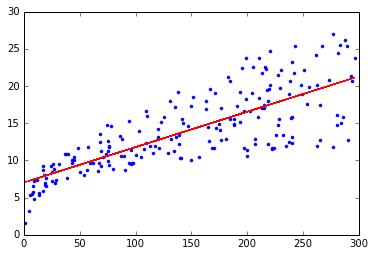

In [34]:
plt.plot(donnees.TV,y,"b.")
plt.plot(donnees.TV,modeleRegSimple.predict(donnees["TV"].reshape(-1,1)),"r")
